for iteration # 0

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.8963218 ]
 [0.92421833]
 [0.92881797]
 [0.94353462]]
Loss: 
0.42611502393468476


for iteration # 500

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.02444536]
 [0.9263293 ]
 [0.92483465]
 [0.09037492]]
Loss: 
0.004960600800301629


for iteration # 1000

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.01217014]
 [0.95856809]
 [0.95802243]
 [0.05075125]]
Loss: 
0.0015506301749883852




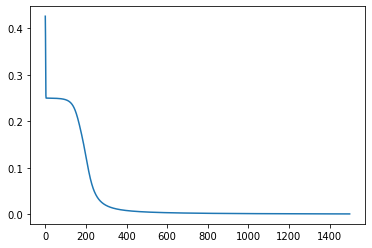

<Figure size 432x288 with 0 Axes>

In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
        
      
# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)


# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np. zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1))
    
        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
loss = []
diff = []

NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 500 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
    loss.append(np.mean(np.square(y - NN.feedforward())))
    
    diff.append(y-NN.feedforward())
    NN.train(X, y)
plt.plot(loss)
plt.show()
plt.clf()